<a href="https://colab.research.google.com/github/LH-1169213/Equipo3/blob/main/Redneuronal_Equipo01_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* A01039274  Guzmán Briones Fernando
* A01794163  Martinez Anguiano Edgar
* A01793920  Montaña Vasquez Jonathan
* A01215432    Torres Ferguson Carlos Roberto
* A01002111  Cruz Nájera Luis Salvador


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

####Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. 

####El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí: 
https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-
Rita/dec55692590820754b53c916e29bb2b42c0e5104  
 
####Y el conjunto de datos utilizado es el de la siguiente liga de la UCI: 
https://archive.ics.uci.edu/ml/datasets/Facebook+metrics 

####El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas. El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”, “Lifetime People who have liked a Page and engaged with a post” y “Likes”.  

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import numpy as np
import requests, zipfile
from io import BytesIO
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
# Descargamos dataset
req = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip')

# Extraemos el contenido y lo almacenamos en el path
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/Facebook_metrics')

In [ ]:
# Desplegamos las primeras líneas del dataset descargado
df = pd.read_csv('/content/sample_data/Facebook_metrics/dataset_Facebook.csv', sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


#**Ejercicio-1.** 

####1).- En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. ####

In [ ]:
df.rename(columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'}, inplace = True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
X = df[['Category', 'Page total likes', 'Type', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
y = df['LPE']

#**Ejercicio-2.**

####2).- Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.####

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=100, 
                                                  random_state=10)
X_train.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
305,3,124940,Photo,6,2,4,0.0
107,2,136736,Status,10,4,1,0.0
350,2,116435,Photo,5,9,5,0.0
334,2,119198,Status,5,2,1,0.0
142,2,136013,Status,10,2,3,1.0


#**Ejercicio-3.**

####3).-  Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE. ####

In [ ]:
def mi_RMSE(yr,yp):
    return (np.mean(np.square(yr-yp)))**(1/2)

def mi_MAE(yr,yp):
    return np.mean(np.abs(yr-yp)) 

def mi_MAPE(yr,yp):
    return np.mean(np.abs((yr-yp))/yr) * 100

#**Ejercicio-4.**

####4).- En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información. ####

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 305 to 265
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          400 non-null    int64  
 1   Page total likes  400 non-null    int64  
 2   Type              400 non-null    object 
 3   Post Month        400 non-null    int64  
 4   Post Hour         400 non-null    int64  
 5   Post Weekday      400 non-null    int64  
 6   Paid              399 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


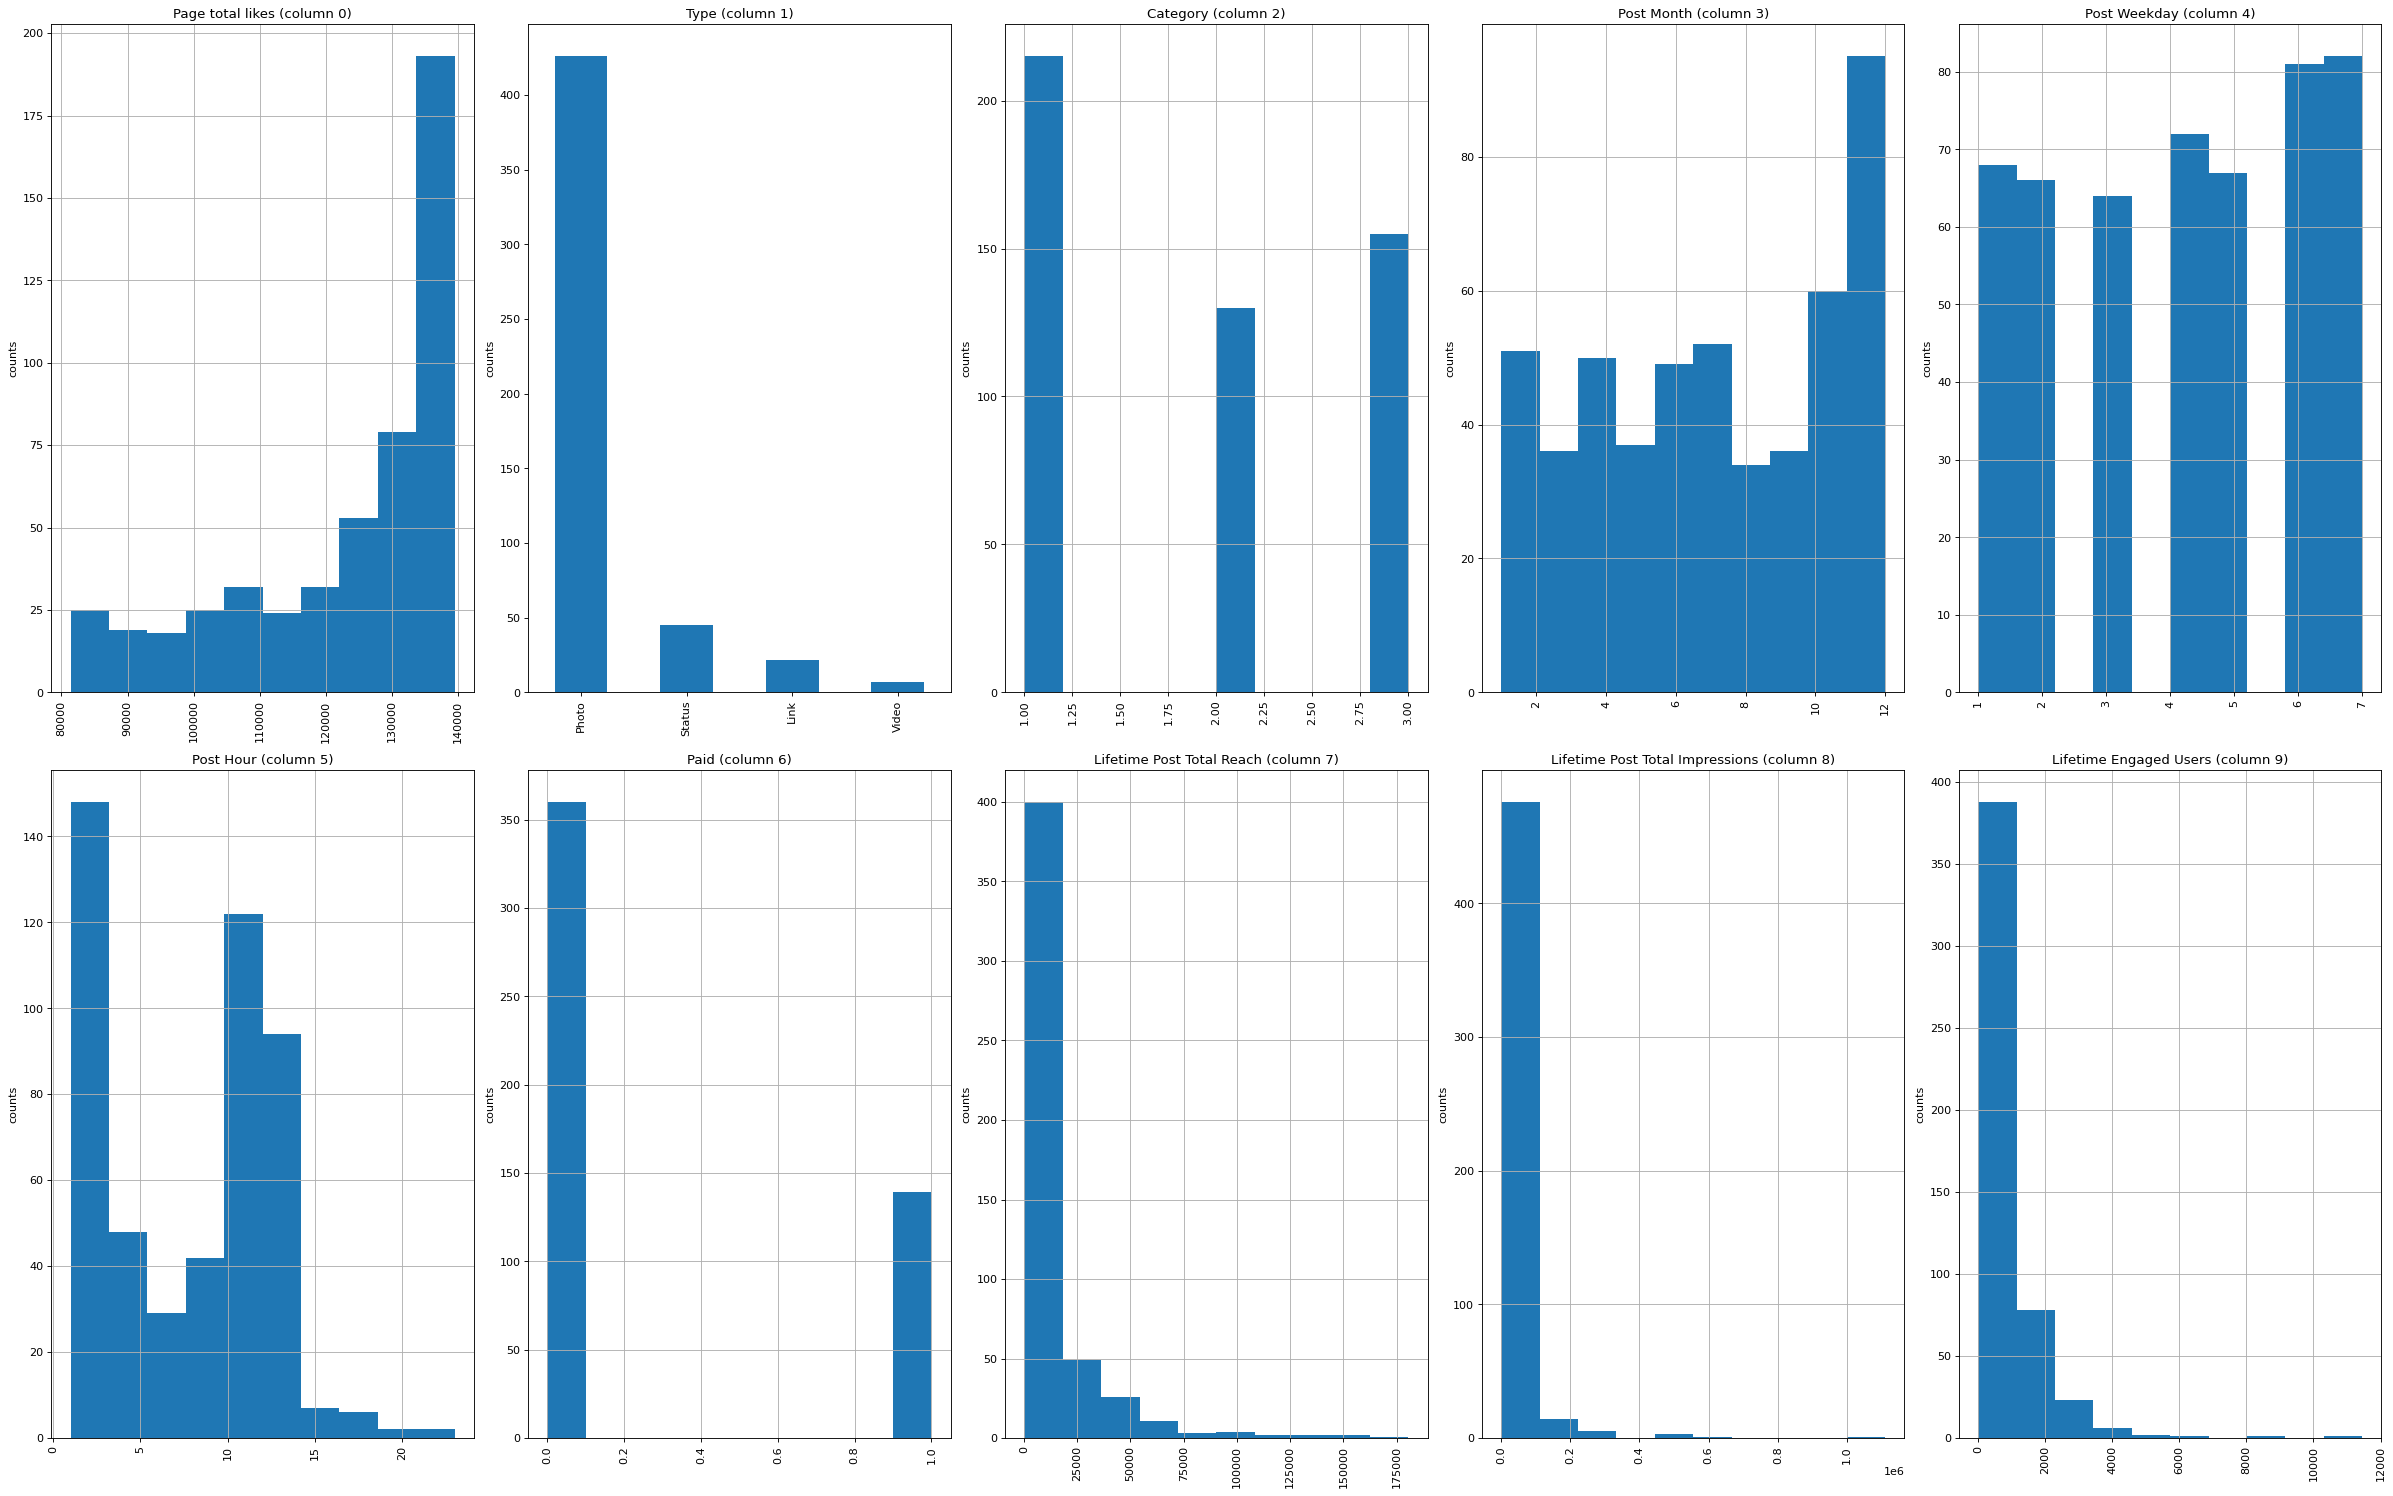

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 10, 5)

In [ ]:
print("Valores de Category:\n", X_train["Category"].value_counts())
print("Valores de Type:\n", X_train["Type"].value_counts())
print("Valores de Post Month:\n", X_train["Post Month"].value_counts())
print("Valores de Post Hour:\n", X_train["Post Hour"].value_counts())
print("Valores de Post Weekday:\n", X_train["Post Weekday"].value_counts())
print("Valores de Paid:\n", X_train["Paid"].value_counts())

Valores de Category:
 1    173
3    122
2    105
Name: Category, dtype: int64
Valores de Type:
 Photo     343
Status     34
Link       17
Video       6
Name: Type, dtype: int64
Valores de Post Month:
 10    46
7     43
4     42
12    42
6     37
11    36
5     32
3     30
8     26
9     26
2     22
1     18
Name: Post Month, dtype: int64
Valores de Post Hour:
 3     85
10    62
13    42
11    39
2     29
4     27
12    22
9     20
6     15
7     12
8     11
5     11
14    10
15     6
1      3
17     2
18     2
20     1
19     1
Name: Post Hour, dtype: int64
Valores de Post Weekday:
 7    65
6    62
3    56
5    55
2    55
4    54
1    53
Name: Post Weekday, dtype: int64
Valores de Paid:
 0.0    291
1.0    108
Name: Paid, dtype: int64


In [ ]:
categorical_columns = ["Category", "Type"]
categorical_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                   ("encoder", OneHotEncoder(handle_unknown="ignore", sparse= False))])

ordinal_columns = ["Post Month", "Post Hour", "Post Weekday"]
ordinal_pipe = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                               ("encoder", OneHotEncoder(handle_unknown="ignore", sparse= False))])

numerical_columns = ["Page total likes"]
numerical_pipe = Pipeline(steps = [("imputer", SimpleImputer(strategy='mean')),
                                   ("scaler", MinMaxScaler())])

binary_columns = ["Paid"]
binary_pipe = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),
                                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse= False))])

preprocessor = ColumnTransformer(transformers=[("cat", categorical_pipe, categorical_columns),
                                               ("ord", ordinal_pipe, ordinal_columns),
                                               ("num", numerical_pipe, numerical_columns),
                                               ("bin", binary_pipe, binary_columns)], remainder='passthrough')
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Category', 'Type']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Post Month', 'Po

#**Ejercicio-5.**

####5).- Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: ####
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html 

In [ ]:
None

#**Ejercicio-6.**

####6).- Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan. ####

In [ ]:
None

#**Ejercicio-7.**

###7).- Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.####

In [ ]:
None

#**Ejercicio-8.**

####8).- Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” "learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.#### 

In [ ]:
None

#**Ejercicio-9.**

####9).- Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. ####

In [ ]:
None

#**Ejercicio-10.**

####10).- Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.####

In [ ]:
None

#**Ejercicio-11.**

####11).- Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.####

In [ ]:
None

#**Ejercicio-12.**

####12).- Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad####

In [ ]:
None

###**Fin de la Actividad de la semana 7.**